# Searching for the category

For this code along we are only going to use the products DataFrame. However, if you believe there is information in other tables that can help to create categories, please feel free to explore.

In [ ]:
import pandas as pd

In [ ]:
# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

product_category_df = products_cl.copy()

## 1.&nbsp; Category creation by search term
Let's start by creating a column `category`. For now we'll fill this column with a blank string `""`.

In [ ]:
product_category_df["category"] = ""
product_category_df.head()

,sku,name,desc,price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,


We can find all the products with certain words in their `description` using `.loc[]` and `.str.contains()`. Here we'll look at all the items that have the word `keyboard` in their description.

In [ ]:
product_category_df.loc[
                          product_category_df["desc"]
                          .str.contains("keyboard", case=False)
                       ].sample(5)

,sku,long,name,desc,cl_price,type,brands
6913,LOG0194-A,Logitech,Open - Focus Logitech Keyboard Folio iPad Mini...,resistant integrated keyboard folio for iPad M...,92.99,1298,LOG
6841,LOG0084,Logitech,Logitech Ultrathin Keyboard Cover Keyboard Cov...,Ultrathin cover and cover with Bluetooth keybo...,89.99,12575403,LOG
10264,MTF0008,Mistify,Mistify Clean Screens Natural 500ml.,Spray cleaning screens and keyboards.,14.99,12085400,MTF
6849,LOG0156,Logitech,Logitech iPad Keys-To-Go Keyboard Red,Bluetooth wireless mechanical keyboard in Span...,71.99,54025401,LOG
1403,APP2161,Apple,Smart Apple iPad Keyboard Case Keyboard Pro 10...,Cover with keyboard shortcuts and Spanish (dir...,179.00,12635403,APP


Next, we change the value in the category column to `keyboard` for all of these keyboard products.

In [ ]:
product_category_df.loc[
                          product_category_df["desc"]
                          .str.contains("keyboard", case=False),
                          "category"
                       ]= "keyboard"

Let's take a look at the effect that had on the `category` column.

In [ ]:
product_category_df["category"].value_counts()

            9903
keyboard      89
Name: category, dtype: int64

## 2.&nbsp; Category creation using regex
We can also use a product's `name` to select products for our categories.

In [ ]:
product_category_df.loc[
                          product_category_df["name"]
                          .str.contains("apple iphone", case=False)
                       ].sample(5)

,sku,long,name,desc,cl_price,type,brands
1024,APP2036,Apple,Open - Apple iPhone 64 GB Space Gray - As new,Free Apple iPhone 64GB Space Gray (MLM62Y / A),549.0,51601716,APP
972,APP1972,Apple,Apple iPhone 32GB Rose Gold,New iPhone SE with 4-inch screen 32 free GB.,419.0,51601716,APP
1023,APP2024,Apple,Open - Apple iPhone 5s 16GB Space Gray - As new,Free Apple iPhone 5s 16GB Space Gray (ME432Y / A),489.0,1716,APP
8469,AP20415,Apple,Like new - Apple iPhone 6s Plus 128GB Rose Gold,Apple iPhone 6s Plus 128GB Reconditioned Free ...,749.0,24811716,AP2
8270,AP20121,Apple,Second hand - Smart Battery Apple iPhone Batte...,Reconditioned Case with battery for iPhone Res...,119.0,"5,49E+11",AP2


Looks like we get a lot of accessories included in this search. We can refine this using a little regex. Here, we will add `.{0,7}` at the beginning of the search: this means we will find all `apple iphone`s that have 7 or less characters preceding the term "apple iphone" - if there's 8 characters preceding the search term, it won't be found. This should help refine our search by using the nomenclature of the DataFrame to our advantage.

If you feel unsure about regex, please use [regex101](https://regex101.com/). It's really useful for checking your code, and parts of other people's code that you're unsure about.

In [ ]:
product_category_df.loc[
                        product_category_df["name"]
                        .str.contains("^.{0,7}apple iphone", case=False)
                      ].sample(5)

,sku,long,name,desc,cl_price,type,brands
1046,APP2031,Apple,Open - Apple iPhone 6s 64GB Silver - like new,Apple Apple iPhone 6s 64 GB Silver (MKQP2QL / A),769.0,1716,APP
1444,APP1964-A,Apple,Open - Apple iPhone 32GB Space Gray,iPhone SE with 4 inch 32GB free,419.0,1298,APP
1546,APP2560,Apple,Apple iPhone Leather Case Cover Red X,Leather case Apple official,59.0,11865403,APP
1192,APP2094,Apple,Apple iPhone Silicone Case Cover 7 Rosa Flamenco,Ultrathin silicone case and microfiber premium...,39.0,11865403,APP
694,APP1682,Apple,Apple iPhone Silicone Case Cover 7 Blue Sea,Ultrathin silicone case and microfiber premium...,39.0,11865403,APP


Now we can use the same trick as before to set the category - selecting the `category` column and setting it to the string of our choice.

In [ ]:
product_category_df.loc[
                        product_category_df["name"]
                        .str.contains("^.{0,7}apple iphone", case=False),
                        "category"
                       ] = "smartphone"

In [ ]:
product_category_df["category"].value_counts()

              9634
smartphone     269
keyboard        89
Name: category, dtype: int64

## 3.&nbsp; One product with multiple categories
A product may fit into multiple categories. To help us create multiple categories for one product, we will use the python addition assignment `+=`. The addition assignment is a shorthand way to add something (number, string, etc...) to a variable without changing the variable name.

Let's have a look at a couple of examples.

In [ ]:
a = 10
a = a + 5
a

15

In [ ]:
a = 10
a += 5
a

15

In [ ]:
b = "Tyrannosaurus"
b = b + " rex"
b

'Tyrannosaurus rex'

In [ ]:
b = "Tyrannosaurus"
b += " rex"
b

'Tyrannosaurus rex'

Now let's look at how this can help us in our category creation.

First, we'll reset all the values in the category column to an empty string `""`.

In [ ]:
product_category_df["category"] = ""

Now, let's create some categories and utilise the addition assignment.

In [ ]:
product_category_df.loc[product_category_df["desc"]
                        .str.contains("keyboard", case=False),
                        "category"
                       ] += ", keyboard"
product_category_df.loc[product_category_df["name"]
                        .str.contains("^.{0,7}apple iphone", case=False),
                        "category"
                       ] += ", smartphone"
product_category_df.loc[product_category_df["name"]
                        .str.contains("^.{0,7}apple ipod", case=False),
                        "category"
                       ] += ", ipod"
product_category_df.loc[product_category_df["name"]
                        .str.contains("^.{0,7}apple ipad|tablet", case=False),
                        "category"
                       ] += ", tablet"
product_category_df.loc[product_category_df["name"]
                        .str.contains("imac|mac mini|mac pro", case=False),
                        "category"
                       ] += ", desktop"

In [ ]:
product_category_df["category"].value_counts()

                       8362
, desktop               923
, tablet                307
, smartphone            269
, keyboard               83
, ipod                   42
, keyboard, tablet        4
, keyboard, desktop       2
Name: category, dtype: int64

As you can see, some products now have 2 categories instead of just one. At the end, you can use your skills with string to tidy up the opening comma and space in the `category` column.

# Challenge. Your categories
Now it's your turn. We'll reset the Dataframe so that no categories exist, and it's up to you to create the categories based on keywords in the name and description. Feel free to go wild and make as many categories as you like.
* Remember you can also use regex to refine your searches.
* Remember you can use the or operator `|` to search for multiple terms at once.
* Remember to tidy up any untidy strings at the end.

## Load the Data

In [ ]:
def gd_path(file_id):
    """Generate a shareable link from Google Drive file id."""
    return f"https://drive.google.com/uc?export=download&id={file_id}"

csv_names = ['products', 'orders', 'orderlines']

# Google Drive file ids


files_id = {
    'products':"1Me1equ0TUXoVnmHU31FPj0XrXZlmRXvd"
}

# Read data from Google Drive
products_me = pd.read_csv(gd_path(files_id['products']), sep=",")

Preprocessing

In [ ]:
# Replace the DataFrame with a copy of another DataFrame
product_category_df = products_me.copy()

# Drop specific columns from the DataFrame
product_category_df = product_category_df.drop(columns=(['cl_deff','cl_deff_2','price','promo_price'])).copy()

# Add a new column 'brands' based on the values in the 'sku' column
product_category_df['brands'] = product_category_df.sku.str[:3].copy()
product_category_df.sample()


,sku,long,name,desc,cl_price,type,brands
2879,OWC0210,OWC,OWC Mercury Elite Pro Dual Box USB 3.1 Raid Th...,RAID outer box 35 inches or 25 inches with fre...,362.99,11935397,OWC


Exploration of category `type` and `brand`

In [ ]:
product_category_df.type.value_counts(normalize=True).sample(5)

9,29E+11     0.000097
11434        0.000097
106431714    0.002825
2434         0.002727
13615399     0.007597
Name: type, dtype: float64

In [ ]:
 most_30_count_type = (
                      product_category_df.type.value_counts(normalize=True)
                                         .nlargest(30)
                                         .reset_index()
                                         .drop('type', axis=1)
                      )

In [ ]:
most_30_count_type.sample(5)

,index
6,12635403
18,5398
5,1282
12,12585395
2,1298


In [ ]:
(
product_category_df[['type','brands']].value_counts(normalize=True)
                                      .head(30)
                                      .reset_index()
                                      .sort_values(by=0)
                                      .sample(10)
)

,type,brands,0
11,2158,APP,0.010422
19,1405,WAC,0.007500
28,11865403,TUC,0.006039
16,11865403,OTT,0.008571
18,1298,APP,0.008084
14,1364,OWC,0.009058
5,"5,74E+15",PAC,0.017337
3,1433,PAC,0.020843
21,118692158,APP,0.007013
23,12175397,SYN,0.006623


Reducing the scope of the search to the top `type` that most often occur.


In [ ]:
top_30_types = most_30_count_type.merge(product_category_df,
                                        how="inner",
                                        left_on='index',
                                        right_on='type').copy()
top_30_types[top_30_types.name.str.contains('Watch')].sample(5)

,index,sku,long,name,desc,cl_price,type,brands
7720,2449,XDO0038,X-Doria,X-Doria Metal Mesh Strap Watch 38mm Silver Apple,Mesh belt stainless steel X-Doria for Apple Wa...,49.99,2449,XDO
7725,2449,ICA0087,Incase,Incase Nylon Nato Strap 42mm Red Apple Watch,Nylon belt finish and adjustable buckle anodiz...,39.95,2449,ICA
7716,2449,XDO0021,X-Doria,X-Doria Lux Apple Watch Strap 38mm White Croc,Leather strap for easy installation Apple Watch.,30.99,2449,XDO
7728,2449,ICA0088,Incase,Incase Leather Strap Band Apple Watch 42mm brown,Genuine leather strap with stainless steel buc...,59.95,2449,ICA
7723,2449,ICA0082,Incase,Incase Leather Strap Band Apple Watch 38mm Black,Genuine leather strap with stainless steel buc...,59.95,2449,ICA


# Analysis of `desc` and `name`.

### Looking for generic terms that mostly occur in these columns

In [ ]:
def top_word_desc(df, column, count=50):
    # Replace spaces with commas in the specified column and convert it to a list
    list_of_desc = df[column].str.replace(' ', ',').to_list()

    # Join the list elements with commas
    combined_list = ','.join(list_of_desc)

    # Split the joined string by commas and create a DataFrame
    df_desc = pd.DataFrame(list(combined_list.split(',')))

    # Filter words that consist only of alphabetic characters and start with a capital letter
    filtered_words = (
                      df_desc[df_desc[0].str.isalpha() &
                              df_desc[0].str.match(r'\b[A-Z][a-zA-Z]*\b')]
                              .value_counts(normalize=True)
                              .sort_values(ascending=False).head(count)
                      )

    return filtered_words

In [ ]:
top_word_desc(top_30_types, 'desc', count=50).sample(5)

HDMI       0.006365
Monitor    0.004939
WD         0.011200
Retina     0.022713
SATA       0.005183
dtype: float64

In [ ]:
top_word_desc(top_30_types, 'name', count=5)

Case     0.039591
Apple    0.038044
Pro      0.033172
RAM      0.028299
SSD      0.023215
dtype: float64

In [ ]:
top_word_desc(product_category_df, 'long', count=5)

Apple     0.200691
Pack      0.152149
OWC       0.034152
Repair    0.022544
Belkin    0.021297
dtype: float64

Combining the findings into one data frame.

In [ ]:
df_all_column = (
                 top_word_desc(top_30_types, 'desc', count=100)
                 .to_frame()
                 .rename(columns={0:'test'})
                 .reset_index()
                 .drop('test',axis=1)
                 .rename(columns={0:'desc'})
)

In [ ]:
df_all_column['name'] = (
                 top_word_desc(top_30_types, 'name', count=100)
                 .to_frame()
                 .rename(columns={0:'test'})
                 .reset_index()
                 .drop('test',axis=1)
                 .rename(columns={0:'name'})
)

Only use the one-worded brands

In [ ]:
brands_df = (
             product_category_df[~product_category_df.long.str.contains(" ")]
                                                     .long.value_counts()
                                                     .to_frame()
                                                     .reset_index()
                                                     .drop('long',axis=1)
                                                     .rename(columns={'index':'brands_word'})

)

In [ ]:
brands_df.sample(5)

,brands_word
77,Allocacoc
41,Incase
17,Mophie
82,Eizo
42,Elago


In [ ]:
df_all_column_brand =(
                      df_all_column.merge(brands_df,
                                          how="left",
                                          left_on="name",
                                          right_on="brands_word")
                      .copy()
)

In [ ]:
pd.set_option('display.max_rows', None)
df_all_column_brand.sample(5)

,desc,name,brands_word
72,Portable,Ultra,NaN
98,Radeon,Ghz,NaN
27,IronWolf,Blue,NaN
92,Screen,Aura,NaN
36,Network,Bar,NaN


In [ ]:
df_all_column_brand[df_all_column_brand.brands_word.isna()].desc.sort_values().sample(5)

96          IPS
6           NAS
48    Ultrathin
51        Smart
61     Wireless
Name: desc, dtype: object

In [ ]:
df_all_column_brand[df_all_column_brand.brands_word.isna()].name.sort_values().sample(5)

90       Survivor
91          Clear
94          Folio
24    Thunderbolt
42        Network
Name: name, dtype: object

## Exploring category `repair`

In [ ]:
top_30_types[~(top_30_types.sku.str.contains('APP')) &
             (top_30_types.desc.str.contains('IPhone', case=False)) &
             (top_30_types.cl_price > 400)].sample(5)

,index,sku,long,name,desc,cl_price,type,brands
5300,"1,44E+11",REP0307,Repair,Load Connector Repair iPhone 6 Plus,Repair service including parts and labor for i...,599.90600,"1,44E+11",REP
2447,1298,WIT0011-A,Withings,Open - Withings Blood Pressure Monitor Wireles...,Wireless Withings Blood Pressure Monitor Blood...,921.97644,1298,WIT
7000,5398,JBL0143,JBL,JBL Bluetooth Portable Speaker Boombox,Boombox Bluetooth speaker JBL compatible with ...,499.00000,5398,JBL
3593,11905404,PAC1400,Pack,Elgato Eve and Energy Plug Power Wireless Sens...,Control on / off and power / consumer remote s...,999.79900,11905404,PAC
5319,"1,44E+11",REP0287,Repair,iPhone repair posterior chamber 5c,Repair service including parts and labor for i...,599.90600,"1,44E+11",REP


Alternative way to filter the data frame.

In [ ]:
(
 top_30_types.loc[top_30_types[['desc','name']]
                  .apply(lambda x : x.str.contains('Watch'))
                  .any(axis=1)]
                  .info()
 )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 2175 to 7930
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     180 non-null    object 
 1   sku       180 non-null    object 
 2   long      180 non-null    object 
 3   name      180 non-null    object 
 4   desc      180 non-null    object 
 5   cl_price  180 non-null    float64
 6   type      180 non-null    object 
 7   brands    180 non-null    object 
dtypes: float64(1), object(7)
memory usage: 12.7+ KB


# Filter

According to the exploration of the general terms in the columns `desc` and `name` the following categories have been chosen.



```
- Computers
  - Laptop: *MacBook and Apple, Radeon (and PACK ), Air, iMac, Radeon
    - Type: '1298', '1282', '1,02E+12', '2158'
  - Desktop : Xeon, Server
- Phones
  - IPhone
  - Samsung
- Tablets
  - Apple: Ipad
  - Other :Tablet
- Accessories
  - Phone Cases: Survivor, Silicone,  Protector, OtterBox; LifeProof; Leather;  Folio; Hard Shell; Cover; Case
  - Tablet Cases
  - Cables/Charging: Cable
  - Watch: Strap
- Components
  - Storage: Western; Hard Drive; External; Aura, SSD, HD, HDD
  - Other Components
- Imput and Output Devisec
  - Keyboard/Mouse: Keyboard, Touch
  - Audio: Speaker; Headphones
  - Monitor: Monitor
- Othres
  - Watch: Watch
  - Adapter

```





### Computers: Laptop

In [ ]:
top_30_types[
    (
        (top_30_types.long.str.contains('Sonnet|QNAP|Synology|Apple', case=False))
        & (
            ((top_30_types.desc.str.contains('MacBook | Air', case=False)))
            | ((top_30_types.name.str.contains('MacBook | Air', case=False)))
        )
    )
    & (top_30_types.cl_price > 460)
].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 2151 to 7657
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     379 non-null    object 
 1   sku       379 non-null    object 
 2   long      379 non-null    object 
 3   name      379 non-null    object 
 4   desc      379 non-null    object 
 5   cl_price  379 non-null    float64
 6   type      379 non-null    object 
 7   brands    379 non-null    object 
 8   category  379 non-null    object 
dtypes: float64(1), object(8)
memory usage: 29.6+ KB


### Computers: Desktop

In [ ]:
top_30_types[
    (
        (top_30_types.long.str.contains('Sonnet|QNAP|Synology|Apple', case=False))
        & ~(
            ((top_30_types.desc.str.contains('MacBook | Air', case=False)))
            | ((top_30_types.name.str.contains('MacBook | Air', case=False)))
        )
    )
    & (top_30_types.cl_price > 400)
].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 427 entries, 0 to 8161
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     427 non-null    object 
 1   sku       427 non-null    object 
 2   long      427 non-null    object 
 3   name      427 non-null    object 
 4   desc      427 non-null    object 
 5   cl_price  427 non-null    float64
 6   type      427 non-null    object 
 7   brands    427 non-null    object 
dtypes: float64(1), object(7)
memory usage: 30.0+ KB


### Phones: Apple IPhone

In [ ]:
top_30_types[
    (
        top_30_types.long.str.contains('')
        & (
            (top_30_types.desc.str.contains('phone', case=False))
            | (top_30_types.name.str.contains('phone', case=False))
        )
    )
    & (top_30_types.cl_price > 400)
].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 33 to 7067
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     60 non-null     object 
 1   sku       60 non-null     object 
 2   long      60 non-null     object 
 3   name      60 non-null     object 
 4   desc      60 non-null     object 
 5   cl_price  60 non-null     float64
 6   type      60 non-null     object 
 7   brands    60 non-null     object 
dtypes: float64(1), object(7)
memory usage: 4.2+ KB


### Phones: Ohter Phones: Not found

In [ ]:
top_30_types[
    (
        top_30_types.long.str.contains('Apple')
        & (
            (top_30_types.desc.str.contains('iphone', case=False))
            | (top_30_types.name.str.contains('iphone', case=False))
        )
    )
    & (top_30_types.cl_price > 400)
].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 2160 to 2211
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     6 non-null      object 
 1   sku       6 non-null      object 
 2   long      6 non-null      object 
 3   name      6 non-null      object 
 4   desc      6 non-null      object 
 5   cl_price  6 non-null      float64
 6   type      6 non-null      object 
 7   brands    6 non-null      object 
dtypes: float64(1), object(7)
memory usage: 432.0+ bytes


### Tablets: Apple *Ipad*

In [ ]:
top_30_types[
    (
        top_30_types.long.str.contains('Apple')
        & (
            (top_30_types.desc.str.contains('ipad', case=False))
            | (top_30_types.name.str.contains('ipad', case=False))
        )
    )
    & (top_30_types.cl_price > 400)
].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 2150 to 2217
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     10 non-null     object 
 1   sku       10 non-null     object 
 2   long      10 non-null     object 
 3   name      10 non-null     object 
 4   desc      10 non-null     object 
 5   cl_price  10 non-null     float64
 6   type      10 non-null     object 
 7   brands    10 non-null     object 
dtypes: float64(1), object(7)
memory usage: 720.0+ bytes


### Accessories: Phone/Tablet Cases

In [ ]:
top_30_types[
    (
        (top_30_types.desc.str.contains('Survivor | Silicone | Protector | Cover | Case', case=False))
        | top_30_types.name.str.contains('Survivor | Silicone | Protector | Cover | Case', case=False)
    )
    & (top_30_types.cl_price < 200)
].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1862 entries, 1086 to 8089
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1862 non-null   object 
 1   sku       1862 non-null   object 
 2   long      1862 non-null   object 
 3   name      1862 non-null   object 
 4   desc      1862 non-null   object 
 5   cl_price  1862 non-null   float64
 6   type      1862 non-null   object 
 7   brands    1862 non-null   object 
dtypes: float64(1), object(7)
memory usage: 130.9+ KB


### Accessories: Cables/Charging

In [ ]:
top_30_types[
    (
        (top_30_types.desc.str.contains('Cable | Charging' , case=False))
        | top_30_types.name.str.contains('Cable | Charging' , case=False)
    )
    & (top_30_types.cl_price < 148)
].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 1341 to 7935
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     256 non-null    object 
 1   sku       256 non-null    object 
 2   long      256 non-null    object 
 3   name      256 non-null    object 
 4   desc      256 non-null    object 
 5   cl_price  256 non-null    float64
 6   type      256 non-null    object 
 7   brands    256 non-null    object 
dtypes: float64(1), object(7)
memory usage: 18.0+ KB


### Accessories: Watch: *Strap*

In [ ]:
top_30_types[
    (
          (top_30_types.desc.str.contains('Strap', case=False))
          |(top_30_types.name.str.contains('Strap', case=False))
    )
    & (top_30_types.cl_price > 1)
].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 2175 to 7764
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     128 non-null    object 
 1   sku       128 non-null    object 
 2   long      128 non-null    object 
 3   name      128 non-null    object 
 4   desc      128 non-null    object 
 5   cl_price  128 non-null    float64
 6   type      128 non-null    object 
 7   brands    128 non-null    object 
dtypes: float64(1), object(7)
memory usage: 9.0+ KB


### Components: Storage

In [ ]:
top_30_types[
    top_30_types.desc.str.contains('External | hard drive | SSD | HDD', case=False)
    & (top_30_types.cl_price < 1000)
    & ~top_30_types.long.str.contains('pack', case=False)
].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 2219 to 7971
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     690 non-null    object 
 1   sku       690 non-null    object 
 2   long      690 non-null    object 
 3   name      690 non-null    object 
 4   desc      690 non-null    object 
 5   cl_price  690 non-null    float64
 6   type      690 non-null    object 
 7   brands    690 non-null    object 
dtypes: float64(1), object(7)
memory usage: 48.5+ KB


### Input and Output Devices: Keyboard/Mouse

In [ ]:
top_30_types[
    (
        (top_30_types.desc.str.contains('Keyboard | Mouse | Touch', case=False))
        | (top_30_types.name.str.contains('Keyboard | Mouse | Touch', case=False))
    )
    & (top_30_types.cl_price < 500)
].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 1271 to 8014
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     250 non-null    object 
 1   sku       250 non-null    object 
 2   long      250 non-null    object 
 3   name      250 non-null    object 
 4   desc      250 non-null    object 
 5   cl_price  250 non-null    float64
 6   type      250 non-null    object 
 7   brands    250 non-null    object 
dtypes: float64(1), object(7)
memory usage: 17.6+ KB


### Input and Output Devices: Audio

In [ ]:
top_30_types[
    (
        (top_30_types.desc.str.contains('Speaker | Headphones', case=False))
        | (top_30_types.name.str.contains('Speaker | Headphones', case=False))
    )
    & (top_30_types.cl_price > 1)
].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 2632 to 7070
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     269 non-null    object 
 1   sku       269 non-null    object 
 2   long      269 non-null    object 
 3   name      269 non-null    object 
 4   desc      269 non-null    object 
 5   cl_price  269 non-null    float64
 6   type      269 non-null    object 
 7   brands    269 non-null    object 
dtypes: float64(1), object(7)
memory usage: 18.9+ KB


### Input and Output Devices: Monitor

In [ ]:
top_30_types[
    (
        (top_30_types.desc.str.contains('Monitor', case=False))
        & (top_30_types.desc.str.contains('"'))
    )
    | (
        (top_30_types.name.str.contains('Monitor', case=False))
        | (top_30_types.name.str.contains('inch'))
    )
].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 2137 to 7257
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     258 non-null    object 
 1   sku       258 non-null    object 
 2   long      258 non-null    object 
 3   name      258 non-null    object 
 4   desc      258 non-null    object 
 5   cl_price  258 non-null    float64
 6   type      258 non-null    object 
 7   brands    258 non-null    object 
dtypes: float64(1), object(7)
memory usage: 18.1+ KB


### Others: Watch

In [ ]:
top_30_types[
    (
        (top_30_types.desc.str.contains('Watch', case=False))
        | (top_30_types.name.str.contains('Watch', case=False))
    )
    & ~(
        (top_30_types.name.str.contains('Strap', case=False))
        & (top_30_types.desc.str.contains('Strap', case=False))
    )
].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 2175 to 7930
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     134 non-null    object 
 1   sku       134 non-null    object 
 2   long      134 non-null    object 
 3   name      134 non-null    object 
 4   desc      134 non-null    object 
 5   cl_price  134 non-null    float64
 6   type      134 non-null    object 
 7   brands    134 non-null    object 
dtypes: float64(1), object(7)
memory usage: 9.4+ KB


### Others: Adapter

In [ ]:
top_30_types[
    (
        top_30_types.desc.str.contains('Adapter', case=False)
    )
    & ~(
        (
            top_30_types.name.str.contains('Wireless | Ethernet', case=False)
        )
        & (
            top_30_types.desc.str.contains('Wireless | Ethernet', case=False)
        )
    )
].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 2136 to 7776
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     234 non-null    object 
 1   sku       234 non-null    object 
 2   long      234 non-null    object 
 3   name      234 non-null    object 
 4   desc      234 non-null    object 
 5   cl_price  234 non-null    float64
 6   type      234 non-null    object 
 7   brands    234 non-null    object 
dtypes: float64(1), object(7)
memory usage: 16.5+ KB


# All Categories.

In [ ]:
#create the column "category" in the Dataframe
top_30_types['category'] = "NaN"

# Computers: Laptop
top_30_types.loc[
    (
        (top_30_types.long.str.contains('Sonnet|QNAP|Synology|Apple', case=False))
        & (
            ((top_30_types.desc.str.contains('MacBook | Air', case=False)))
            | ((top_30_types.name.str.contains('MacBook | Air', case=False)))
        )
    )
    & (top_30_types.cl_price > 460),
'category' ] = "Laptop"

# Computers: Desktop
top_30_types.loc[
    (
        (top_30_types.long.str.contains('Sonnet|QNAP|Synology|Apple', case=False))
        & ~(
            ((top_30_types.desc.str.contains('MacBook | Air', case=False)))
            | ((top_30_types.name.str.contains('MacBook | Air', case=False)))
        )
    )
    & (top_30_types.cl_price > 400),
'category' ] = "Desktop"

# Phones: Phones: Apple IPhone
top_30_types.loc[
    (
        top_30_types.long.str.contains('Apple')
        & (
            (top_30_types.desc.str.contains('iphone', case=False))
            | (top_30_types.name.str.contains('iphone', case=False))
        )
    )
    & (top_30_types.cl_price > 400),
'category' ] = "IPhone"

# Accessories: Phone/Tablet Cases
top_30_types.loc[
    (
        (top_30_types.desc.str.contains('Survivor | Silicone | Protector | Cover | Case', case=False))
        | top_30_types.name.str.contains('Survivor | Silicone | Protector | Cover | Case', case=False)
    )
    & (top_30_types.cl_price < 200),
'category' ] = "Cases"

# Accessories: Cables/Charging
top_30_types.loc[
    (
        (top_30_types.desc.str.contains('Cable | Charging' , case=False))
        | top_30_types.name.str.contains('Cable | Charging' , case=False)
    )
    & (top_30_types.cl_price < 148),
'category' ] = "Cables"

# Accessories: Watch: Strap
top_30_types.loc[
    (
          (top_30_types.desc.str.contains('Strap', case=False))
          |(top_30_types.name.str.contains('Strap', case=False))
    )
    & (top_30_types.cl_price > 1),
'category' ] = "Strap"

# Components: Storage
top_30_types.loc[
    top_30_types.desc.str.contains('External | hard drive | SSD | HDD', case=False)
    & (top_30_types.cl_price < 1000)
    & ~top_30_types.long.str.contains('pack', case=False),
'category' ] = "Storage"

# Input and Output Devices: Keyboard/Mouse
top_30_types.loc[
    (
        (top_30_types.desc.str.contains('Keyboard | Mouse | Touch', case=False))
        | (top_30_types.name.str.contains('Keyboard | Mouse | Touch', case=False))
    )
    & (top_30_types.cl_price < 500),
'category' ] = "Input Devices"

# Input and Output Devices: Audio
top_30_types.loc[
    (
        (top_30_types.desc.str.contains('Speaker | Headphones', case=False))
        | (top_30_types.name.str.contains('Speaker | Headphones', case=False))
    )
    & (top_30_types.cl_price > 1),
'category' ] = "Audio"

# Input and Output Devices: Monitor
top_30_types.loc[
    (
        (top_30_types.desc.str.contains('Monitor', case=False))
        & (top_30_types.desc.str.contains('"'))
    )
    | (
        (top_30_types.name.str.contains('Monitor', case=False))
        | (top_30_types.name.str.contains('inch'))
    ),
'category' ] = "Monitor"

# Others: Watch
top_30_types.loc[
    (
        (top_30_types.desc.str.contains('Watch', case=False))
        | (top_30_types.name.str.contains('Watch', case=False))
    )
    & ~(
        (top_30_types.name.str.contains('Strap', case=False))
        & (top_30_types.desc.str.contains('Strap', case=False))
    ),
'category' ] = "Watch"

# Others: Adapter
top_30_types.loc[
    (
        top_30_types.desc.str.contains('Adapter', case=False)
    )
    & ~(
        (
            top_30_types.name.str.contains('Wireless | Ethernet', case=False)
        )
        & (
            top_30_types.desc.str.contains('Wireless | Ethernet', case=False)
        )
    ),
'category' ] = "Adapter"

In [ ]:
top_30_types.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8162 entries, 0 to 8161
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     8162 non-null   object 
 1   sku       8162 non-null   object 
 2   long      8162 non-null   object 
 3   name      8162 non-null   object 
 4   desc      8162 non-null   object 
 5   cl_price  8162 non-null   float64
 6   type      8162 non-null   object 
 7   brands    8162 non-null   object 
 8   category  8162 non-null   object 
dtypes: float64(1), object(8)
memory usage: 637.7+ KB


In [ ]:
top_30_types.drop(["brands","index","name","desc"],axis=1).sample(5)

,sku,long,cl_price,type,category
7133,SAN0095,SanDisk,19.90,57445397,NaN
7192,TRA0036,Trascend,182.00,57445397,NaN
2245,JMO0074-A,Just Mobile,24.99,1298,Cases
6338,WDT0349,Western Digital,339.00,12215397,Storage
4679,THU0040,Thule,39.95,12635403,Cases


## Save data

In [ ]:
from google.colab import files

top_30_types.to_csv("top_30_types.csv", index=False)
files.download('top_30_types.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 4 Using `type` to create categories
There could be another way to create categories, but this one you'll have to explore this one alone.

We have the mysterious column `type` in the `products` table. This could potentially be ready-made categories labelled with numbers instead of words. Let's investigate.

In [ ]:
category_type_df = products_cl.copy()

Here are the `type`s that have the most products.

In [ ]:
category_type_df.groupby("type").count().nlargest(10, "sku").sample(5)

,sku,name,desc,price,in_stock
type,,,,,
11905404,454,454,454,454,454
12175397,939,939,939,939,939
13835403,269,269,269,269,269
1298,783,783,783,783,783
1282,373,373,373,373,373


Let's have a look at the first `type` to see if we can make categories from this column.

In [ ]:
category_type_df.loc[category_type_df["type"] == "1298"].sample(5)

,sku,name,desc,price,in_stock,type
7827,OWC0139-A,Open - OWC Thunderbolt 2 Dock Cable,Dock refitted 12 ports Thunderbolt connection ...,337.99,0,1298
5830,AII0052-A,(Open) Aiino Custodia Elegance iPhone 6 Blue,Smart Cover for iPhone 6,16.99,0,1298
6115,TRA0032-A,(Open) Transcend JetDrive Lite 360 ​​256GB Mac...,MLC memory card 256 GB Macbooks Retina 15 inch...,184.00,0,1298
6931,APP0384-A,"Open - Apple MacBook Pro 133 ""Core i5 25GHz |...",MacBook Pro laptop 133 inches,1199.00,0,1298
7704,NTE0095-A,Open - NewerTech NuPower Battery 39W MacBook A...,lithium battery and 7.6V 39W MacBook Air 11 in...,95.99,0,1298


Looks like this is a category of phone cases.

Let's have a look at the 2nd largest type to see if that's also a clear category.

In [ ]:
category_type_df.loc[category_type_df["type"] == "12175397"].sample(5)

,sku,name,desc,price,in_stock,type
1195,PAC0586,Synology DS415 + Pack | WD 8TB Network,Synology DS415 + Pack 8TB (4x2TB) WD Network f...,1010.99,0,12175397
1318,PAC0601,Synology DS1815 Pack + | WD 32TB Network,Pack Synology DS1815 + 32TB WD Network for Mac...,2628.97,0,12175397
8603,PAC2366,Synology DS218 + NAS Server | 2GB RAM | 24TB (...,NAS storage server integrated with special foc...,1344.97,0,12175397
8639,PAC2448,Synology DS918 + NAS Server | 16GB RAM | 12TB ...,NAS server of the Plus Series for companies se...,1332.67,0,12175397
8662,PAC2447,Synology DS918 + NAS Server | 16GB RAM | 8TB (...,NAS server of the Plus Series for companies se...,1212.67,0,12175397


Looks like this category is full of servers.

I wonder how many `type`s account for most of our products?

In [ ]:
n = 30
percentage = (
    (
        (
            category_type_df.groupby('type')
            .count()
            .nlargest(n, 'sku')['sku'].sum()
        ) / category_type_df.shape[0]
    ) * 100
).round(2)
print(
    f"With the {n} largest types, we account for {percentage}% of all products."
)

With the 30 largest types, we account for 78.4% of all products.


Looks like we can simply investigate 30 types and set the categories, then the remaining 20% of products can have the category `other`.

Use the skills you learnt above to change the category for each type.

# BONUS



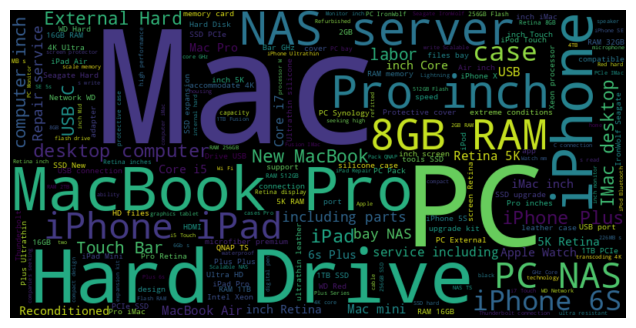

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Concatenate all text data into a single string
text = ' '.join(top_30_types['desc'])

#Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    colormap='viridis',
    contour_color='steelblue'
  ).generate(text)

#Display the word cloud using matplotlib
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

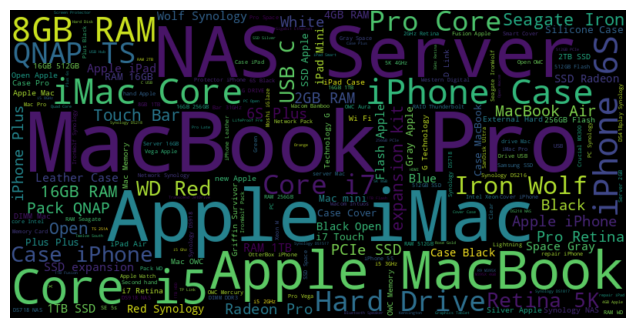

In [ ]:
#Concatenate all text data into a single string
text = ' '.join(top_30_types['name'])

#Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    colormap='viridis',
    contour_color='steelblue'
  ).generate(text)

#Display the word cloud using matplotlib
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

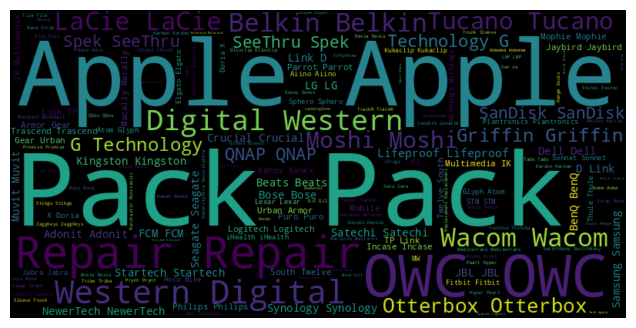

In [ ]:
#Concatenate all text data into a single string
text = ' '.join(top_30_types['long'])

#Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    colormap='viridis',
    contour_color='steelblue'
  ).generate(text)

#Display the word cloud using matplotlib
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()